# Test statistic and p-value assignment

Recall that any non-adaptive classification algorithm that does not use training set to tune its parameters can be converted to a statistical test. For that we must fix a null hypothesis as a source of negative samples and measure the false positives rate.
Usually, a classifier internally computes a decsision value $t$ aka test score and different trade-offs are possible.
Thus we can assign false positive rate $p(t)$ for each theshold value $t$. 
This value is known as p-value.  

In [1]:
import numpy as np
import pandas as pd
import numpy.random as rnd

from pandas import Series
from pandas import DataFrame

from tqdm import tnrange
from plotnine import *

from scipy.stats import norm

## I. Formal definition of a p-value

Let $t$ be a test statistic computed from a sample $\boldsymbol{x}$ as $f(\boldsymbol{x})$. Let $\mathcal{D}$ be the distribution of $\boldsymbol{x}$ determined by the null hypotesis. Then p-value is a probability

\begin{align*}
\mathrm{pvalue}(t)=\Pr[\boldsymbol{x}_*\gets\mathcal{B}, t_*=f(\boldsymbol{x}_*): t_*\geq t]\enspace.
\end{align*}

Note that this definition corresponds to a classifier that classifier all samples $\boldsymbol{x}$ as negatives if $f(\boldsymbol{x})\geq t$ and $\mathrm{pvalue}(t)$ is just the fraction of false positives.

Obviously, we can reverse the classification rule and then  p-value is a probability

\begin{align*}
\mathrm{pvalue}(t)=\Pr[\boldsymbol{x}_*\gets\mathcal{B}, t_*=f(\boldsymbol{x}_*): t_*\leq t]\enspace.
\end{align*}

Both definitions are quite common. Intuitively, you should fix the direction based extremeness. 
If you consider larger values more extreme then you should consider the first formula. It is also possible to use double treshold and consider cut-off based $|t|$. This leads to the third formula

\begin{align*}
\mathrm{pvalue}(t)=\Pr[\boldsymbol{x}_*\gets\mathcal{B}, t_*=f(\boldsymbol{x}_*): |t_*|\geq |t|]\enspace.
\end{align*}




## Statistical power of a test

Different classification algorithms are good for different task. The same is true for statistical tests.
Thresholding bases on p-value allows us to control the ratio of false positives (significance level).
On the same time it also affects the ratio of false negatives. The latter is harder to quantify as it depends on two factors:
* definition of a test statistic (*statistical test*)
* the data distribution of positive cases (*alternative hypothesis*)

Of course, a test cannot really work equally good for all alternative hypotheses.
Hence, a statistical test is commonly defined to work well for all reasonable alternative hypotheses.
For instance, let the null hypothesi be that the iid data sample is form a normal distibution $\mathcal{N}(\mu=0,\sigma=1)$. Then it makes sense to consider a class of alternative hypotheses where the iid data sample is from a normal distribution $\mathcal{N}(\mu\neq 0,\sigma=1)$. 
This situation naturally arrises in quality control were we must check that some physical quantity is zero and the measurement procedure is corrupted by additive Gaussian noise $\mathcal{N}(\mu=0,\sigma=1)$. 

Now for any alternative hypothesis spacified by distibution $\mathcal{D}$ we can compute the recall probability

\begin{align*}
\Pr[data\gets \mathcal{D}: \text{test accepts }]\enspace.
\end{align*}

This is known as **power** of the statistical test. A good test has large recall for alternative hypotheses. 
For our example case, the latter cannot be achieved since $\mathcal{N}(\mu=0,\sigma=1)$ can be arbitrarily close to 
$\mathcal{N}(\mu=0,\sigma=1)$. In general, the best we can achive is that for all alternaive hypotheses our test performs roughly as well as the best test designed for that null hypothesis and alternative hypothesis pair. 


# Homework

## 2.1 Properties of p-value (<font color='red'>1p</font>)

Let the test statistic $t$ be $t=\sin(x)$. Find p-value function $\mathrm{pvalue}(t)$ for the null hypothesis where $x$ is sampled uniformly form the range $[-\pi, \pi]$. Find out what is the distribution of $\mathrm{pvalue}(t)$ for $t=\sin(x)$. Explain why do you get this result?
* You can use simulation or simple probability computations to determine when $\sin(x_*)\geq t$.
* You can use simulation or simple probability computations to determine the disttibution of $\mathrm{pvalue}(t)$.

## Solution

**Let $T = \sin(X)$ be a statistical test where $X \sim \mathcal{U}(-\pi, \pi)$. We are interested in the probabilities $\Pr(T \geq t)$. Let us first draw the sine function from $-\pi$ to $\pi$ to visualize the situation.**

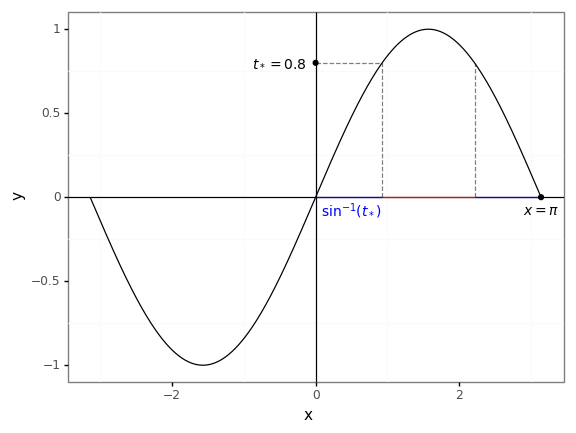

<ggplot: (7553278535)>

In [2]:
x = np.linspace(-np.pi, np.pi, 1000)
y = np.sin(x)
sine_data = DataFrame({'x': x, 'y': y})
t = 0.8

ggplot() + \
    geom_line(sine_data, aes(x = 'x', y = 'y')) + \
    geom_vline(xintercept = 0) + \
    geom_hline(yintercept = 0) + \
    annotate('segment', x = [np.arcsin(t), np.pi - np.arcsin(t)], y = [0, 0], xend = [np.arcsin(t), np.pi - np.arcsin(t)], yend = [t, t], linetype = 'dashed', alpha = 0.5) + \
    annotate('segment', x = 0, y = t, xend = np.arcsin(t), yend = t, linetype = 'dashed', alpha = 0.5) + \
    annotate('segment', x = [0, np.pi - np.arcsin(t)], y = [0, 0], xend = [np.arcsin(t), np.pi], yend = [0, 0], colour = 'blue') + \
    annotate('segment', x = np.arcsin(t), y = 0, xend = np.pi - np.arcsin(t), yend = 0, colour = 'red') + \
    annotate('point', x = [0, np.pi], y = [t, 0]) + \
    annotate('text', x = np.pi, y = -0.08, label = r'$x = \pi$', size = 10) + \
    annotate('text', x = -0.5, y = t, label = r'$t_* = {}$'.format(t), size = 10) + \
    annotate('text', x = 0.5, y = -0.08, label = r'$\sin^{-1}(t_*)$', size = 10, colour = 'blue') + \
    theme_bw() + \
    theme(panel_grid_major = element_blank())

**Because $X$ is uniformly distributed between $-\pi$ and $\pi$, the probability that $T \geq 0.8$ in the figure above is the length of the red line over $2\pi$. We can easily find the length of the red line because we know the lengths of the blue lines through the $\arcsin$-function. We can generalize this argument to derive the analytical distribution of $T$:**

\begin{equation}
\Pr(T \geq t) =
\begin{cases}
  1, &\ t \leq -1 \\
  \dfrac{\pi + 2\arcsin(-t)}{2\pi}, &\ t \in (-1, 0] \\
  \dfrac{\pi - 2\arcsin(t)}{2\pi}, &\ t \in (0, 1] \\
  0, &\ t > 1
\end{cases} =
\begin{cases}
  1, &\ t \leq -1 \\
  \dfrac{\pi - 2\arcsin(t)}{2\pi}, &\ t \in (-1, 1] \\
  0, &\ t > 1
\end{cases}.
\end{equation}

**We can visualize this distribution and compare it with the empirical one:**

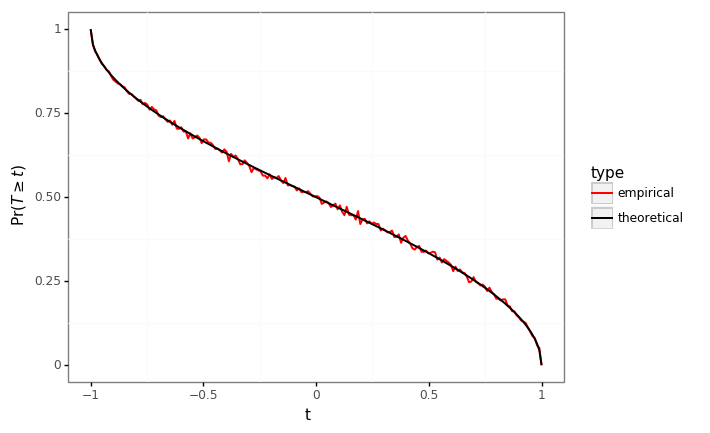

<ggplot: (-9223372029301222663)>

In [3]:
def pvalue_theoretical(t, a = -np.pi, b = np.pi):
    if t <= -1:
        return 1
    elif t > 1:
        return 0
    else:
        return (np.pi - 2*np.arcsin(t)) / (2*np.pi)

def pvalue_empirical(t, a = -np.pi, b = np.pi, N_sims = 5000):
    fx = np.array([np.sin(x) for x in np.random.uniform(a, b, N_sims)])
    return np.mean(fx >= t)

t_values = np.linspace(-1, 1, 200)
p_dist_theoretical = [pvalue_theoretical(t) for t in t_values]
p_dist_empirical = [pvalue_empirical(t) for t in t_values]

dat = pd.concat([DataFrame({'p': p_dist_theoretical, 'type': 'theoretical', 't': t_values}),
                 DataFrame({'p': p_dist_empirical, 'type': 'empirical', 't': t_values})], ignore_index = True)
gg = ggplot(dat, aes(x = 't', y = 'p', colour = 'type')) + \
    geom_line(size = 0.8) + \
    ylab(r'$\Pr(T \geq t)$') + \
    scale_colour_manual(values = ['red', 'black']) + \
    theme_bw() + \
    theme(panel_grid_major = element_blank())
display(gg)

**Indeed, the analytical and empirical p-value distributions match.**

## 2.2 Power of a statistical test (<font color='red'>1p</font>)

Consider two statistical tests defined by the test statistics $t_1=\sin(x)$ and $t_2=\cos(x)$. Find p-value function $\mathrm{pvalue}_i(t)$ for the null hypothesis where $x$ is sampled form $\mathcal{N}(\mu=0, \sigma=1)$.
As an alternative hypothesis consider the case that $x$ is samples from $\mathcal{N}(\mu\neq 0, \sigma=1)$.
For simplicity you can fix $\mu=1$.
Compute the power of both tests for the significance level $5\%$.
You can do simulations but there exists a simple closed form solution for this.

## Solution

**Let $T_1 = \sin(X)$ and $T_2 = \cos(X)$ be two statistical tests. Assume that $X \sim \mathcal{N}(\mu, \sigma^2)$ and for simplicity consider again the one-sided test. Quite possibly there is no simple analytical solution to the probability $\Pr(T_i \geq t)$ because sine and cosine are periodical functions and $X$ can take values from $(-\infty, \infty)$. However, what we saw above with the sine-figure still holds: we need to estimate the probabilities that $X$ belongs to the red region. For normal distribution, this is as follows:**

$$\Pr(a \leq X \leq b | X \sim \mathcal{N}(\mu, \sigma^2)) = \Phi\left( \dfrac{b - \mu}{\sigma} \right) - \Phi\left( \dfrac{a - \mu}{\sigma} \right),$$

**where $\Phi$ is the cumulative distribution function of the standard normal distribution.**

**We will use https://mathoverflow.net/a/100339 and show these analytical forms to the probabilities $\Pr(T_i \geq t)$. Let $F_{T_i}$ be the cumulative distribution function of $T_i$ and $f_X(x)$ the probability density function of $X$. Then**

\begin{align*}
\Pr(T_1 \geq t) &= 1 - F_{T_1}(t) = 1 - \int_{\{ x: \sin(x) \leq t \}}f_X(x)dx = 1 - \sum_{k = -\infty}^\infty \int\limits_{(2k+1)\pi - \arcsin(t)}^{2(k+1)\pi + \arcsin(t)}f_X(x)dx \\
&= 1 - \sum_{k = -\infty}^\infty \left[ \Phi\left( \dfrac{(2(k+1)\pi + \arcsin(t) - \mu}{\sigma} \right) - \Phi\left( \dfrac{(2k+1)\pi - \arcsin(t) - \mu}{\sigma} \right) \right].
\end{align*}

**Similarly,**

$$\Pr(T_2 \geq t) = 1 - \sum_{k = -\infty}^\infty \left[ \Phi\left( \dfrac{2(k+1)\pi - \arccos(t) - \mu}{\sigma} \right) - \Phi\left( \dfrac{2k\pi + \arccos(t) - \mu}{\sigma} \right) \right].$$

**In our case, $\sigma = 1$ and $\mu \in \{0, 1\}$ so it suffices to consider only $k \in \{-1, 0\}$.**

**Let us visualize these distributions and compare with empirical ones. We will assume that $X \sim \mathcal{N}(0, 1)$ as per the null hypothesis.**

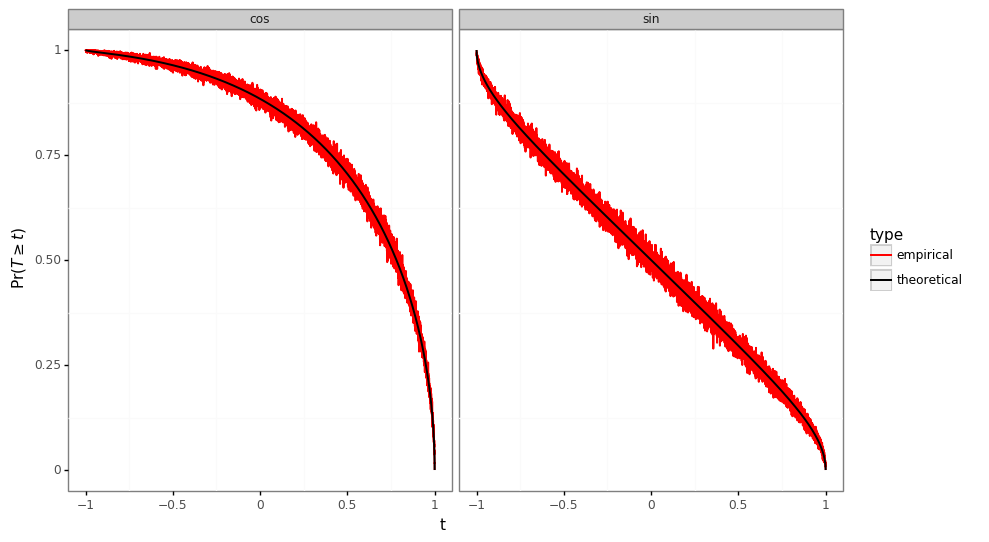

<ggplot: (7554276679)>

In [4]:
def pvalue_sin_empirical(t, mu = 0, sigma = 1, N_sims = 1000):
    fx = np.array([np.sin(x) for x in np.random.normal(mu, sigma, N_sims)])
    return np.mean(fx >= t)
    
def pvalue_cos_empirical(t, mu = 0, sigma = 1, N_sims = 1000):
    fx = np.array([np.cos(x) for x in np.random.normal(mu, sigma, N_sims)])
    return np.mean(fx >= t)

def pvalue_sin_theoretical(t, mu = 0, sigma = 1):
    if t <= -1:
        return 1
    elif t >= 1:
        return 0
    return 1 - np.sum([norm.cdf((2*(k + 1)*np.pi + np.arcsin(t) - mu) / sigma) - norm.cdf(((2*k + 1)*np.pi - np.arcsin(t) - mu) / sigma) for k in range(-1, 1)])

def pvalue_cos_theoretical(t, mu = 0, sigma = 1):
    if t <= -1:
        return 1
    elif t >= 1:
        return 0
    return 1 - np.sum([norm.cdf((2*(k + 1)*np.pi - np.arccos(t) - mu) / sigma) - norm.cdf((2*k*np.pi + np.arccos(t) - mu) / sigma) for k in range(-1, 1)])

t_values = np.linspace(-1, 1, 10000)

p_sin_theoretical = np.array([pvalue_sin_theoretical(t) for t in t_values])
p_sin_empirical = np.array([pvalue_sin_empirical(t) for t in t_values])

p_cos_theoretical = np.array([pvalue_cos_theoretical(t) for t in t_values])
p_cos_empirical = np.array([pvalue_cos_empirical(t) for t in t_values])

distribution_dat = pd.concat([DataFrame({'p': p_sin_theoretical, 'function': 'sin', 'type': 'theoretical', 't': t_values}),
                              DataFrame({'p': p_sin_empirical, 'function': 'sin', 'type': 'empirical', 't': t_values}),
                              DataFrame({'p': p_cos_theoretical, 'function': 'cos', 'type': 'theoretical', 't': t_values}),
                              DataFrame({'p': p_cos_empirical, 'function': 'cos', 'type': 'empirical', 't': t_values})], ignore_index = True)
ggplot(distribution_dat, aes(x = 't', y = 'p', colour = 'type')) + \
    geom_line(size = 0.8) + \
    ylab(r'$\Pr(T \geq t)$') + \
    scale_colour_manual(values = ['red', 'black']) + \
    facet_wrap(['function']) + \
    theme_bw() + \
    theme(panel_grid_major = element_blank(),
          figure_size = (10, 6))

**The analytical and empirical p-value distributions seem to match. We could gauge from the figure the critical values $t_{1*}$ and $t_{2*}$ such that**

$$\Pr(T_1 \geq t_{1*} | H_0) = \alpha,$$
$$\Pr(T_2 \geq t_{2*} | H_0) = \alpha,$$

**where $\alpha = 0.05$. However, we will try to be more accurate and determine these from the tabulated values:**

In [5]:
t_critical = distribution_dat[(distribution_dat.type == 'theoretical') & (distribution_dat.p <= 0.05)] \
    .groupby(['function'])['t'] \
    .aggregate([('t_critical', 'min')])
display(t_critical)

,t_critical
function,
cos,0.998200
sin,0.977598


**We can now find the power $\Pr(T_i \geq t_{i*} | H_1)$ for both tests $T_i$ while controlling the type 1 error rate at $\alpha = 0.05$:**

In [6]:
t_critical_sin = t_critical.loc['sin', 't_critical']
print('Power of the test statistic T1 is {}.'.format(pvalue_sin_theoretical(t_critical_sin, mu = 1)))

t_critical_cos = t_critical.loc['cos', 't_critical']
print('Power of the test statistic T2 is {}.'.format(pvalue_cos_theoretical(t_critical_cos, mu = 1)))

Power of the test statistic T1 is 0.14304569381208299.
Power of the test statistic T2 is 0.029042378435056526.


**The statistical power of the test statistic $T_1 = \sin(X)$ is low but for $T_2 = \cos(X)$ it is almost 0, i.e. with this test we are almost never able to reject the null hypothesis, even if the alternative hypothesis actually holds, without loosing control of the $\alpha$**.